In [4]:
from operator import itemgetter
import requests

# Make an API call and check the response.
url = "https://hacker-news.firebaseio.com/v0/topstories.json"
r = requests.get(url)
print(f"Status code: {r.status_code}")

# Process information about each submission.
submission_ids = r.json()
submission_dicts = []
for submission_id in submission_ids[:5]:
    # Make a new API call for each submission.
    url = f"https://hacker-news.firebaseio.com/v0/item/{submission_id}.json"
    r = requests.get(url)
    print(f"id: {submission_id}\tstatus: {r.status_code}")
    response_dict = r.json()

    # Build a dictionary for each article.
    submission_dict = {
        'title': response_dict['title'],
        'hn_link': f"https://news.ycombinator.com/item?id={submission_id}",
        'comments': response_dict['descendants'],
    }
    submission_dicts.append(submission_dict)
submission_dicts = sorted(submission_dicts, key=itemgetter('comments'),
reverse=True)

for submission_dict in submission_dicts:
    print(f"\nTitle: {submission_dict['title']}")
    print(f"Discussion link: {submission_dict['hn_link']}")
    print(f"Comments: {submission_dict['comments']}")

Status code: 200
id: 37461695	status: 200
id: 37470285	status: 200
id: 37469849	status: 200
id: 37466027	status: 200
id: 37444683	status: 200

Title: UK air traffic control meltdown
Discussion link: https://news.ycombinator.com/item?id=37461695
Comments: 157

Title: The Project Gutenberg Open Audiobook Collection
Discussion link: https://news.ycombinator.com/item?id=37466027
Comments: 99

Title: Calculate the difference and intersection of any two regexes
Discussion link: https://news.ycombinator.com/item?id=37470285
Comments: 30

Title: Show HN: Ghidra Plays Mario
Discussion link: https://news.ycombinator.com/item?id=37444683
Comments: 11

Title: The meeting of the minds that launched AI
Discussion link: https://news.ycombinator.com/item?id=37469849
Comments: 10


Status code: 200
id: 37461695	status: 200
id: 37470285	status: 200
id: 37469849	status: 200
id: 37466027	status: 200
id: 37444683	status: 200


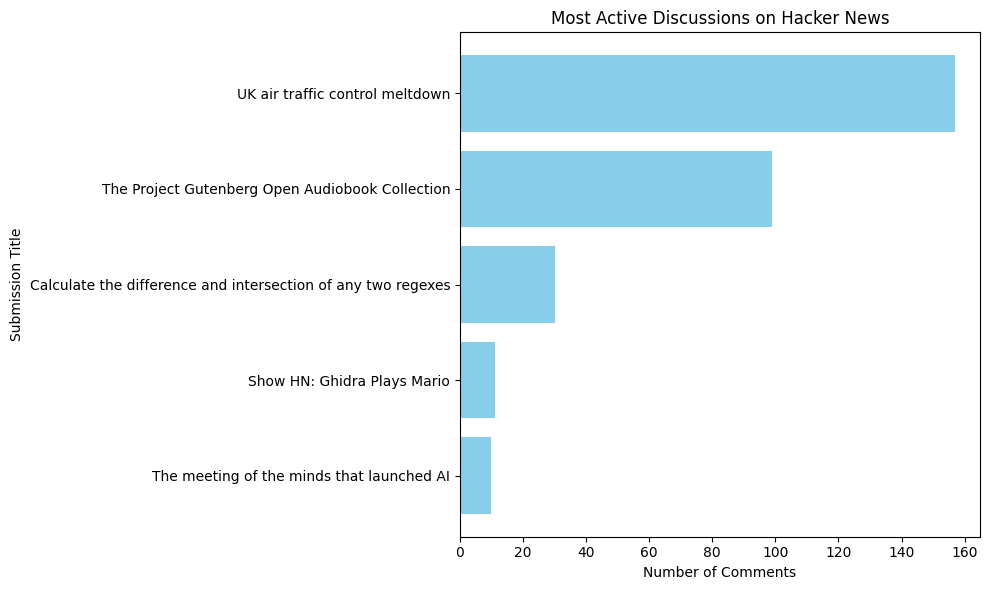

In [5]:
import requests
import matplotlib.pyplot as plt
from operator import itemgetter
import webbrowser

# Make an API call and check the response.
url = "https://hacker-news.firebaseio.com/v0/topstories.json"
r = requests.get(url)
print(f"Status code: {r.status_code}")

# Process information about each submission.
submission_ids = r.json()
submission_dicts = []
for submission_id in submission_ids[:5]:
    # Make a new API call for each submission.
    url = f"https://hacker-news.firebaseio.com/v0/item/{submission_id}.json"
    r = requests.get(url)
    print(f"id: {submission_id}\tstatus: {r.status_code}")
    response_dict = r.json()

    # Build a dictionary for each article.
    submission_dict = {
        'title': response_dict['title'],
        'hn_link': f"https://news.ycombinator.com/item?id={submission_id}",
        'comments': response_dict['descendants'],
    }
    submission_dicts.append(submission_dict)

# Sort the submissions by the number of comments in descending order.
submission_dicts = sorted(submission_dicts, key=itemgetter('comments'), reverse=True)

# Create lists for titles, comments, and links for the bar chart.
titles = [submission['title'] for submission in submission_dicts]
comments = [submission['comments'] for submission in submission_dicts]
links = [submission['hn_link'] for submission in submission_dicts]

# Create the bar chart.
plt.figure(figsize=(10, 6))
plt.barh(titles, comments, color='skyblue')
plt.xlabel('Number of Comments')
plt.ylabel('Submission Title')
plt.title('Most Active Discussions on Hacker News')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most active discussion at the top
plt.tight_layout()

# Add event handling to open the links in a web browser when a title is clicked.
def on_title_click(event):
    index = titles.index(event.artist.get_text())
    webbrowser.open(links[index])

plt.gcf().canvas.mpl_connect('pick_event', on_title_click)

# Show the chart.
plt.show()
